# Supervised Learning | Mutiple Linear Regression | Project 1

Description: Airfares and passengers for U.S. Domestic Routes for 4th Quarter of 2002

Objective: To develop a supervised learning "Average fare" prediction model using multiple linear regression algorithm

Dataset: airq402.dat (Link: http://www.stat.ufl.edu/~winner/data/airq402.dat), Other details about dataset: http://users.stat.ufl.edu/~winner/data/airq402.txt

Variables/Columns:
City1   1-3,
City2   5-7,
Average Fare    11-17,
Distance      20-23,
Average weekly passengers   26-33,
market leading airline    36-37,
market share     40-45,
Average fare    48-54,
Low price airline   57-58,
market share    61-66,
price     69-75

### Import important libraries and setup theme and pallete for data visualization

In [1]:
# Import Basic Libraries
import numpy as np
import pandas as pd

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Theme and Pallete for Data Visualization
%matplotlib inline
sns.set_palette("BrBG")
sns.set_style('whitegrid')

# Import Libraries for Statistical Analysis and Regression 
import scipy.stats as stats
from sklearn.model_selection import train_test_split # Library for splitting data into training and testing
from sklearn.linear_model import LinearRegression # Library for Linear Regression
from sklearn import metrics # For Model Evaluation

### Import and store the data in a dataframe

In [2]:
# Importing dataset directly from table on website
airq = pd.read_table("http://www.stat.ufl.edu/~winner/data/airq402.dat", sep = r'\s+', names = ["city1","city2","averagefare","distance","average weekly passenger","market leading airline","market share 1","averagefare1","low price airline","market share 2","price"])
airq.head(5)
# Note that while importing data from webpage in tabular format there could be varying amount of whitespaces, hence using sep = r'\s+'
# \s+ is the regular expression for "any amount of whitespace"

,city1,city2,averagefare,distance,average weekly passenger,market leading airline,market share 1,averagefare1,low price airline,market share 2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [3]:
# Cleaning any leading/trailing whitespace in the column header
airq.columns = [x.strip() for x in airq.columns]
airq.columns

Index(['city1', 'city2', 'averagefare', 'distance', 'average weekly passenger',
       'market leading airline', 'market share 1', 'averagefare1',
       'low price airline', 'market share 2', 'price'],
      dtype='object')

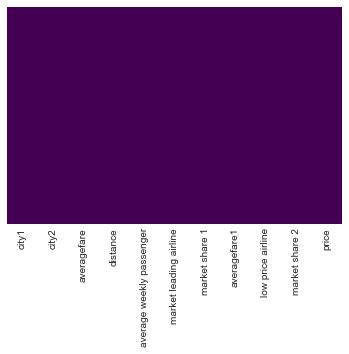

In [4]:
# Missing Value through data visualization
sns.heatmap(airq.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### No missing value, hence data pre-processing related to missing value is not required.

### Understanding shape, data types and other descriptive features of the airfare and passenger dataset

In [5]:
# Type and Shape of Data

print("Type of data:\n\n",(airq.dtypes),"\n")
print("Shape of data:\n",airq.shape)

Type of data:

 city1                        object
city2                        object
averagefare                 float64
distance                      int64
average weekly passenger    float64
market leading airline       object
market share 1              float64
averagefare1                float64
low price airline            object
market share 2              float64
price                       float64
dtype: object 

Shape of data:
 (1000, 11)


In [6]:
# Description of Continuous Variable
airq.describe()

,averagefare,distance,average weekly passenger,market share 1,averagefare1,market share 2,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


Numer of cities in variable City1: 90


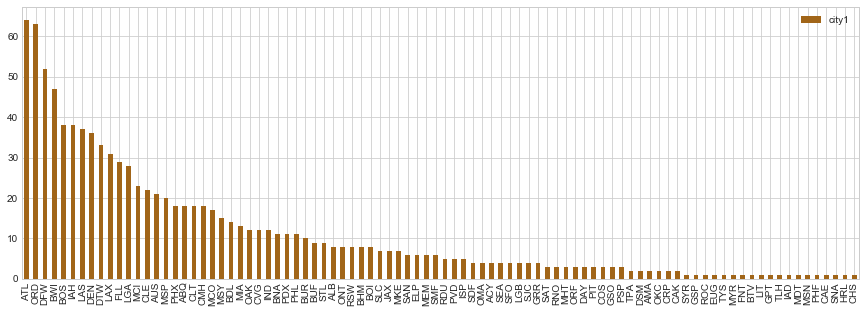

In [7]:
# Description of Categorical Variable - City1, City2, Market Leading Airline, Low Price Airline
cityA = pd.DataFrame(airq['city1'].value_counts())
cityA.plot(kind="bar", figsize = (15,5))
print('Numer of cities in variable City1:',cityA.shape[0])

Numer of cities in variable City2: 85


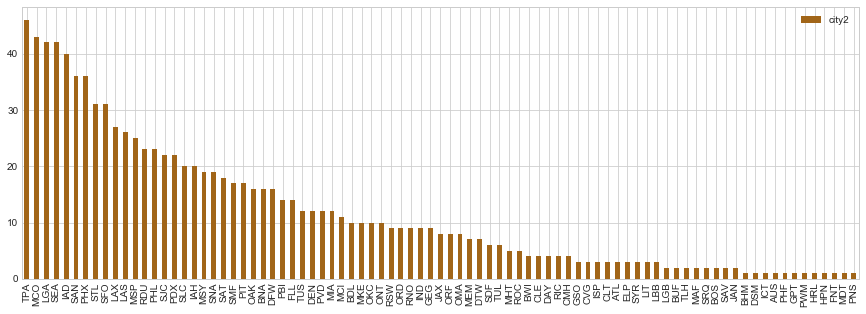

In [8]:
cityB = pd.DataFrame(airq['city2'].value_counts())
cityB.plot(kind="bar", figsize = (15,5))
print('Numer of cities in variable City2:',cityB.shape[0])

Numer of Airlines in variable market leading airline: 16


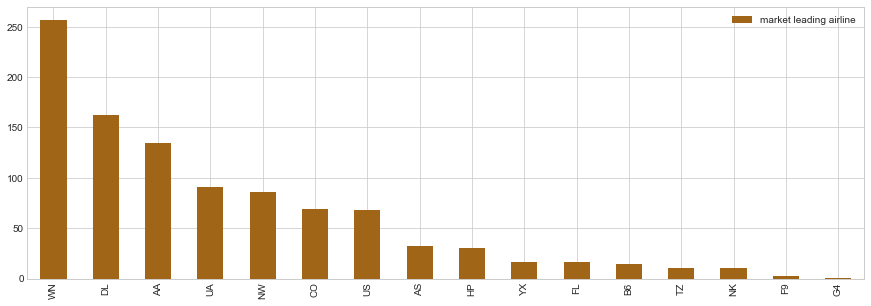

In [9]:
MLA = pd.DataFrame(airq['market leading airline'].value_counts())
MLA.plot(kind="bar", figsize = (15,5))
print('Numer of Airlines in variable market leading airline:',MLA.shape[0])

Numer of Airlines in variable low price airline: 19


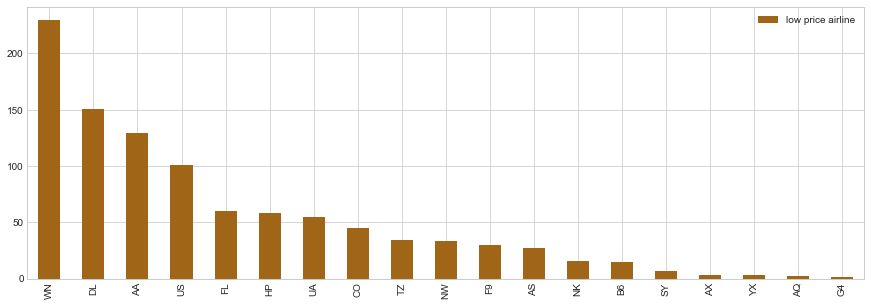

In [10]:
LPA = pd.DataFrame(airq['low price airline'].value_counts())
LPA.plot(kind="bar", figsize = (15,5))
print('Numer of Airlines in variable low price airline:',LPA.shape[0])

In [11]:
# Column Head
airq.columns

Index(['city1', 'city2', 'averagefare', 'distance', 'average weekly passenger',
       'market leading airline', 'market share 1', 'averagefare1',
       'low price airline', 'market share 2', 'price'],
      dtype='object')

In [12]:
# Working data with continuous variable only
wairq = airq.loc[:,['averagefare','distance','average weekly passenger','market share 1','averagefare1','market share 2','price']]
print("Shape of Working Data:",wairq.shape)
wairq.head(5)

Shape of Working Data: (1000, 7)


,averagefare,distance,average weekly passenger,market share 1,averagefare1,market share 2,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


### Indentification and removal of outliers from dataset
Using (Q1 - 1.5 IQR) as the minimum cap and (Q3 + 1.5 IQR) as the max cap. The decision criteria is to consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed.

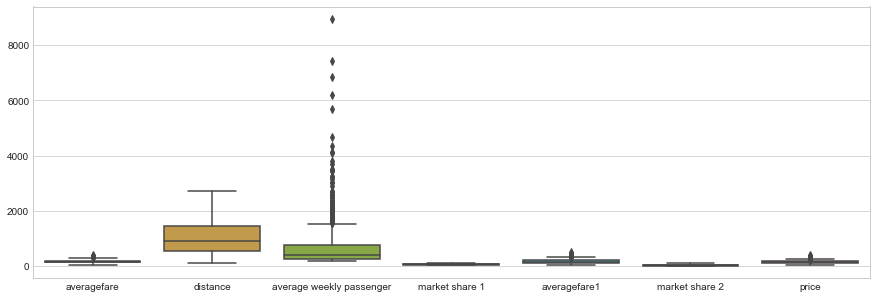

In [13]:
# BOXPLOT to see if their are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.boxplot(data = wairq)

In [14]:
#1 Identification and Removal of outliers
#1.1 Calculation of first quantile (Q1), Third Quantile (Q3), and Inter Quantile Range
Q1 = wairq.quantile(0.25)
Q3 = wairq.quantile(0.75)
IQR = Q3 - Q1
l_bound = Q1 - (1.5*IQR)
u_bound = Q3 + (1.5*IQR)
print("IQR for attributes in dataset:\n", round(IQR,2))

IQR for attributes in dataset:
 averagefare                  71.42
distance                    899.00
average weekly passenger    512.71
market share 1               27.00
averagefare1                 78.89
market share 2               39.78
price                        54.76
dtype: float64


Shape of Actual data(including continuous variables only): (1000, 7) 

Shape of data without outliers: (885, 7) 

Description of data after removal of outliers:
        averagefare  distance  average weekly passenger  market share 1  \
count       885.00    885.00                    885.00          885.00   
mean        160.29   1039.38                    499.13           60.64   
std          48.47    615.22                    327.57           19.36   
min          50.52    108.00                    181.41           17.68   
25%         126.60    564.00                    249.02           47.02   
50%         160.71    914.00                    372.93           59.75   
75%         194.05   1381.00                    644.56           74.66   
max         288.58   2724.00                   1519.89          100.00   

       averagefare1  market share 2   price  
count        885.00          885.00  885.00  
mean         162.59           34.37  140.43  
std           53.29           27.

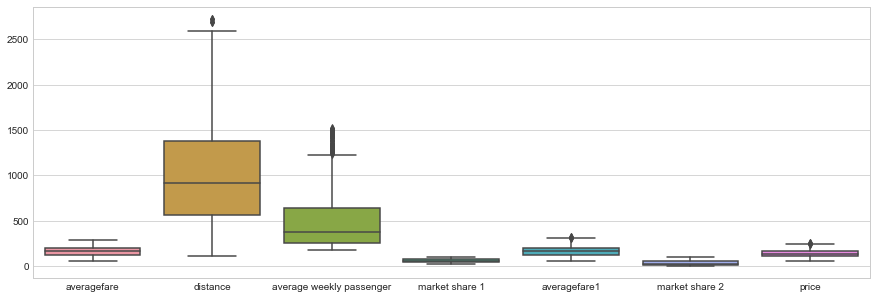

In [15]:
#1.2 Removal of outliers

airw = wairq[~((wairq < l_bound) | (wairq > u_bound)).any(axis=1)]

# Understanding data after removal of outliers
print("Shape of Actual data(including continuous variables only):",wairq.shape,"\n")
print("Shape of data without outliers:",airw.shape,"\n")

# BOXPLOT to see if their are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.boxplot(data = airw)

# Description of Data after removal of outliers
print("Description of data after removal of outliers:\n",round(airw.describe(),2),"\n")

Shape of Actual data (including continuous variables only): (1000, 7) 

Shape of after removal of outliers in first time (885, 7) 

Shape of after removal of outliers in second time: (825, 7) 

Description of data after removal of outliers:
        averagefare  distance  average weekly passenger  market share 1  \
count       825.00    825.00                    825.00          825.00   
mean        160.03   1036.96                    449.70           60.80   
std          46.97    607.18                    258.89           19.52   
min          50.52    108.00                    181.41           17.68   
25%         126.77    566.00                    244.02           47.21   
50%         161.49    914.00                    356.19           59.78   
75%         193.78   1367.00                    576.52           75.16   
max         273.66   2592.00                   1225.43          100.00   

       averagefare1  market share 2   price  
count        825.00          825.00  825.00  

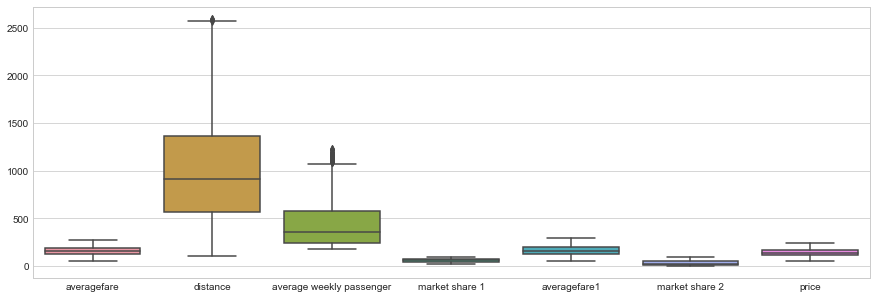

In [16]:
#1.3 As outliers are still present, removing them from the dataset

Q1W = airw.quantile(0.25)
Q3W = airw.quantile(0.75)
IQRW = Q3W - Q1W
lw_bound = Q1W - (1.5*IQRW)
uw_bound = Q3W + (1.5*IQRW)

airw2 = airw[~((airw < lw_bound) | (airw > uw_bound)).any(axis=1)]

# Understanding data after removal of outliers
print("Shape of Actual data (including continuous variables only):",wairq.shape,"\n")
print("Shape of after removal of outliers in first time",airw.shape,"\n")
print("Shape of after removal of outliers in second time:",airw2.shape,"\n")

# BOXPLOT to see if their are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.boxplot(data = airw2)

# Description of Data after removal of outliers
print("Description of data after removal of outliers:\n",round(airw2.describe(),2),"\n")

##### After 2 Iterations still there are a few outliers present on the basis of new Upper Bound and Lower Bound. At present we might go ahead with another round of outlier removal or consider this dataset for modeling. In present case, I'm moving ahead with 825 rows and 7 columns.

### Dependent Variable and Independent Variable(s)
Treat "Average Fare" as Dependent Variable and Rest of the columns as Independent Variables

In [17]:
# Dependent Variable = Average Fare
Y = airw2['averagefare']

# Independent Variable
X = airw2[['distance','average weekly passenger','market share 1','averagefare1','market share 2','price']]

print("Dependent Variable:\n", pd.DataFrame(Y.head(5)),"\n")
print("Independent Variable:\n", pd.DataFrame(X.head(5)))

Dependent Variable:
    averagefare
0       114.47
1       122.47
2       214.42
3        69.40
4       158.13 

Independent Variable:
    distance  average weekly passenger  market share 1  averagefare1  \
0       528                    424.56           70.19        111.03   
1       860                    276.84           75.10        123.09   
2       852                    215.76           78.89        223.98   
3       288                    606.84           96.97         68.86   
4       723                    313.04           39.79        161.36   

   market share 2   price  
0           70.19  111.03  
1           17.23  118.94  
2            2.77  167.12  
3           96.97   68.86  
4           15.34  145.42  


### Correlation between Dependent Variable and Independent Variables
Drop Independent variable which have less than 0.1 correlation with Dependent Variable

In [18]:
corr_matrix = airw2.corr()
corr_matrix['averagefare'].sort_values(ascending=False)

averagefare                 1.000000
averagefare1                0.980001
price                       0.845473
distance                    0.498244
average weekly passenger   -0.187491
market share 1             -0.197023
market share 2             -0.493729
Name: averagefare, dtype: float64

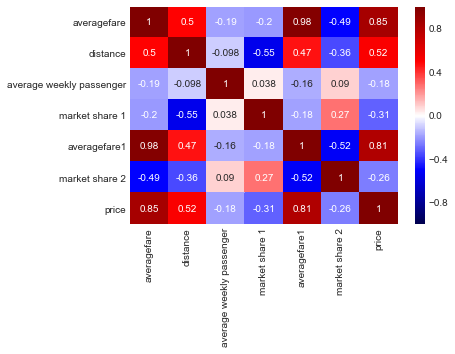

In [19]:
# Correlation between attributes in the given data set
sns.heatmap(airw2.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

### Scatter Plot Between Dependent variable and Independent Variable

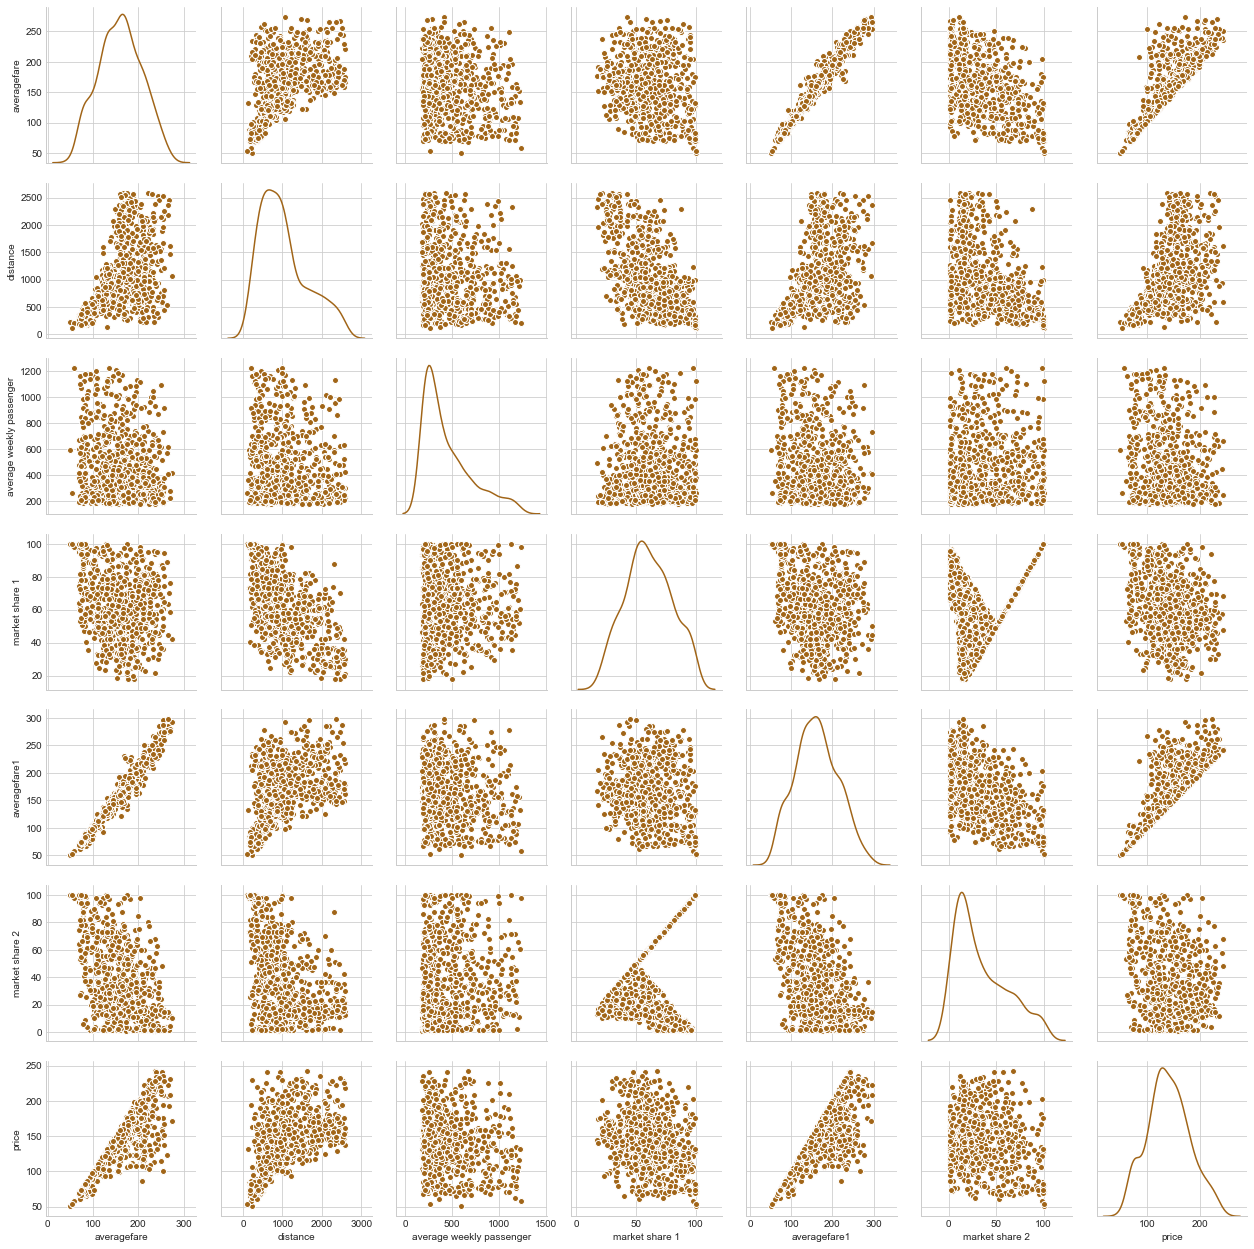

In [20]:
# using pair plot to create scatter plot between all variables (Dependent vs Independent and Independent vs Independent)
sns.pairplot(airw2,diag_kind='kde')

## Build Model - Case 1: Dropping Independent Variable with Correlation < 0.1
Dropping - average weekly passenger, market share 1, market share 2

In [21]:
# Dependent Variable = Average Fare
Y = airw2['averagefare']

# Independent Variable = Distance, Average Fare1, Price
XD = airw2[['distance','averagefare1','price']]

print("Dependent Variable:\n", pd.DataFrame(Y.head(5)),"\n")
print("Independent Variable:\n", pd.DataFrame(XD.head(5)))

Dependent Variable:
    averagefare
0       114.47
1       122.47
2       214.42
3        69.40
4       158.13 

Independent Variable:
    distance  averagefare1   price
0       528        111.03  111.03
1       860        123.09  118.94
2       852        223.98  167.12
3       288         68.86   68.86
4       723        161.36  145.42


### Split data into training and tesing
Training = 80% | Testing = 20%

In [22]:
# Dividing the dataset into train and test sets
XD_train, XD_test, Y_train, Y_test = train_test_split(XD, Y, test_size=0.2, random_state=100)
# random state is setting up a seed value

# Shape of training and tst feature set
print("Shape of X Train:\t",XD_train.shape)
print("Shape of X Test:\t",XD_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)

Shape of X Train:	 (660, 3)
Shape of X Test:	 (165, 3)
Shape of Y Train:	 (660,)
Shape of Y Test:	 (165,)


### Build Multiple Linear Regression Model on training set and develop prediction on testing set

In [23]:
# Multiple Linear Regression
lmd = LinearRegression()

# Model building on training dataset
lmd.fit(XD_train,Y_train)

# Prediction
prediction_d = lmd.predict(XD_test)

### Intercept and Coefficient of Multiple Linear Regression Model

In [24]:
print("Intercept:",round(lmd.intercept_,3),"\n")
coefficients_d = pd.DataFrame(lmd.coef_,XD.columns)
coefficients_d.columns = ['Coefficient']
print("Coefficients:")
round(coefficients_d,3)

Intercept: 7.425 

Coefficients:


,Coefficient
distance,0.002
averagefare1,0.775
price,0.181


### Model Evaluation Metrics and Accuracy of Multiple Linear Regression Model

In [25]:
# Key Metrics
print('MAE:', round(metrics.mean_absolute_error(Y_test, prediction_d),3))
print('MSE:', round(metrics.mean_squared_error(Y_test, prediction_d),3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, prediction_d)),3))
print('R2 Squared:', round(metrics.r2_score(Y_test,prediction_d),3))

MAE: 5.046
MSE: 44.687
RMSE: 6.685
R2 Squared: 0.982


In [26]:
# Accuracy of Training and Testing data set
print("Accuracy of Training data set:\t",round(lmd.score(XD_train,Y_train),3))
print("Accuracy of Testing data set:\t",round(lmd.score(XD_test,Y_test),3))

Accuracy of Training data set:	 0.966
Accuracy of Testing data set:	 0.982


Text(0,0.5,'Predicted Y')

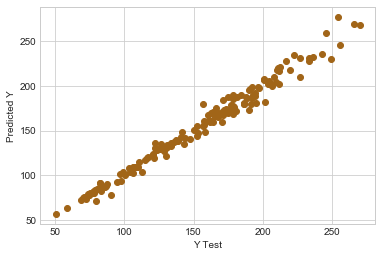

In [27]:
plt.scatter(Y_test,prediction_d)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Build Model - Case 2: Including independent variables having negative correlation with dependent variable and dropping the independent variable falling in (-0.1 to 0.1) corr region
Independent Variable in consideration: 'distance','average weekly passenger','market share 1','averagefare1','market share 2','price'. Note that in this case none of the independent variables fall in (-0.1 to 0.1) correlation region

In [28]:
# Dependent Variable = Average Fare
Y = airw2['averagefare']

# Independent Variable = Distance, Average Weekly Passenger, Market Share 1, Average Fare1, Market Share 2, Price
XA = airw2[['distance','average weekly passenger','market share 1','averagefare1','market share 2','price']]

# Split dataset into train and test sets
XA_train, XA_test, Y_train, Y_test = train_test_split(XA, Y, test_size=0.2, random_state=100)
# random state is setting up a seed value

# Multiple Linear Regression
lma = LinearRegression()

# Model building on training dataset
lma.fit(XA_train,Y_train)

# Prediction
prediction_a = lma.predict(XA_test)

In [29]:
# Intercept and Coefficient
print("Intercept:",round(lma.intercept_,3),"\n")
coefficients_a = pd.DataFrame(lma.coef_,XA.columns)
coefficients_a.columns = ['Coefficient']
print("Coefficients:")
round(coefficients_a,3)

Intercept: 4.956 

Coefficients:


,Coefficient
distance,0.003
average weekly passenger,-0.003
market share 1,0.076
averagefare1,0.754
market share 2,-0.028
price,0.199


In [30]:
# Key Metrics
print('MAE:', round(metrics.mean_absolute_error(Y_test, prediction_a),3))
print('MSE:', round(metrics.mean_squared_error(Y_test, prediction_a),3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, prediction_a)),3))
print('R2 Squared:', round(metrics.r2_score(Y_test,prediction_a),3))

MAE: 4.977
MSE: 42.369
RMSE: 6.509
R2 Squared: 0.983


In [31]:
# Accuracy of Training and Testing data set
print("Accuracy of Training data set:\t",round(lma.score(XA_train,Y_train),3))
print("Accuracy of Testing data set:\t",round(lma.score(XA_test,Y_test),3))

Accuracy of Training data set:	 0.967
Accuracy of Testing data set:	 0.983


Text(0,0.5,'Predicted Y')

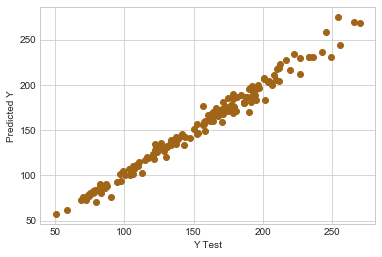

In [32]:
plt.scatter(Y_test,prediction_a)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Build Model - Case 3: Considering effect of high correlation between Price and Average Fare 1. Dropping Price
Independent Variable in consideration: 'distance','average weekly passenger','market share 1','averagefare1','market share 2'.

In [33]:
# Dependent Variable = Average Fare
Y = airw2['averagefare']

# Independent Variable = Distance, Average Weekly Passenger, Market Share 1, Average Fare1, Market Share 2
XAF = airw2[['distance','average weekly passenger','market share 1','averagefare1','market share 2']]

# Split dataset into train and test sets
XAF_train, XAF_test, Y_train, Y_test = train_test_split(XAF, Y, test_size=0.2, random_state=100)
# random state is setting up a seed value

# Multiple Linear Regression
lmaf = LinearRegression()

# Model building on training dataset
lmaf.fit(XAF_train,Y_train)

# Prediction
prediction_af = lmaf.predict(XAF_test)

In [34]:
# Intercept and Coefficient
print("Intercept:",round(lmaf.intercept_,3),"\n")
coefficients_af = pd.DataFrame(lmaf.coef_,XAF.columns)
coefficients_af.columns = ['Coefficient']
print("Coefficients:")
round(coefficients_af,3)

Intercept: 11.38 

Coefficients:


,Coefficient
distance,0.004
average weekly passenger,-0.004
market share 1,0.019
averagefare1,0.884
market share 2,0.055


In [35]:
# Key Metrics
print('MAE:', round(metrics.mean_absolute_error(Y_test, prediction_af),3))
print('MSE:', round(metrics.mean_squared_error(Y_test, prediction_af),3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, prediction_af)),3))
print('R2 Squared:', round(metrics.r2_score(Y_test,prediction_af),3))

MAE: 5.64
MSE: 54.445
RMSE: 7.379
R2 Squared: 0.978


In [36]:
# Accuracy of Training and Testing data set
print("Accuracy of Training data set:\t",round(lmaf.score(XAF_train,Y_train),3))
print("Accuracy of Testing data set:\t",round(lmaf.score(XAF_test,Y_test),3))

Accuracy of Training data set:	 0.959
Accuracy of Testing data set:	 0.978


Text(0,0.5,'Predicted Y')

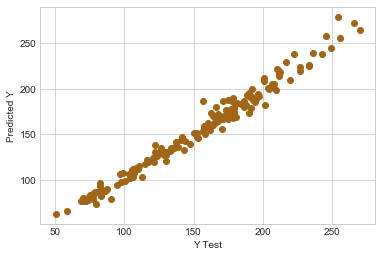

In [37]:
plt.scatter(Y_test,prediction_af)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Build Model - Case 4: Considering effect of high correlation between Price and Average Fare 1. Dropping Average Fare 1
Independent Variable in consideration: 'distance','average weekly passenger','market share 1','market share 2','price'

In [38]:
# Dependent Variable = Average Fare
Y = airw2['averagefare']

# Independent Variable = Distance, Average Weekly Passenger, Market Share 1, Market Share 2, Price
XP = airw2[['distance','average weekly passenger','market share 1','market share 2','price']]

# Split dataset into train and test sets
XP_train, XP_test, Y_train, Y_test = train_test_split(XP, Y, test_size=0.2, random_state=100)
# random state is setting up a seed value

# Multiple Linear Regression
lmp = LinearRegression()

# Model building on training dataset
lmp.fit(XP_train,Y_train)

# Prediction
prediction_p = lmp.predict(XP_test)

In [39]:
# Intercept and Coefficient
print("Intercept:",round(lmp.intercept_,3),"\n")
coefficients_p = pd.DataFrame(lmp.coef_,XP.columns)
coefficients_p.columns = ['Coefficient']
print("Coefficients:")
round(coefficients_p,3)

Intercept: 21.534 

Coefficients:


,Coefficient
distance,0.006
average weekly passenger,-0.004
market share 1,0.385
market share 2,-0.534
price,0.920


In [40]:
# Key Metrics
print('MAE:', round(metrics.mean_absolute_error(Y_test, prediction_p),3))
print('MSE:', round(metrics.mean_squared_error(Y_test, prediction_p),3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, prediction_p)),3))
print('R2 Squared:', round(metrics.r2_score(Y_test,prediction_p),3))

MAE: 12.558
MSE: 358.071
RMSE: 18.923
R2 Squared: 0.857


In [41]:
# Accuracy of Training and Testing data set
print("Accuracy of Training data set:\t",round(lmp.score(XP_train,Y_train),3))
print("Accuracy of Testing data set:\t",round(lmp.score(XP_test,Y_test),3))

Accuracy of Training data set:	 0.803
Accuracy of Testing data set:	 0.857


Text(0,0.5,'Predicted Y')

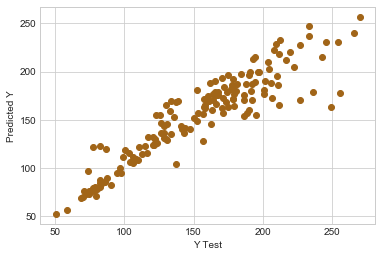

In [42]:
plt.scatter(Y_test,prediction_p)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Conclusion for final model selection based on RMSE and R Squared
###### Case1: Dropping all independent variables having corr < 0.1 with Dependent variable
###### Case2: Including independent variables having negative correlation with dependent variable and dropping the independent variable falling in(-0.1 to 0.1) corr region
###### Case3: Considering high correlation between Price and Averagefare1. Dropping only price
###### Case4: Considering high correlation between Price and Averagefare1. Dropping only averagefare1

In [43]:
# RMSE Comparison
print('Case 1 - RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, prediction_d)),3))
print('Case 2 - RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, prediction_a)),3))
print('Case 3 - RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, prediction_af)),3))
print('Case 4 - RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, prediction_p)),3))

Case 1 - RMSE: 6.685
Case 2 - RMSE: 6.509
Case 3 - RMSE: 7.379
Case 4 - RMSE: 18.923


In [44]:
# R Squared (Model Accuracy Comparison)
print('Case 1 - R2 Squared:', round(metrics.r2_score(Y_test,prediction_d),3))
print('Case 2 - R2 Squared:', round(metrics.r2_score(Y_test,prediction_a),3))
print('Case 3 - R2 Squared:', round(metrics.r2_score(Y_test,prediction_af),3))
print('Case 4 - R2 Squared:', round(metrics.r2_score(Y_test,prediction_p),3))

Case 1 - R2 Squared: 0.982
Case 2 - R2 Squared: 0.983
Case 3 - R2 Squared: 0.978
Case 4 - R2 Squared: 0.857


##### After comparing the RMSE values and Accuracy of models it's pity clear that Case 1 and Case 2 are good fit models with marginal difference in the metric values.
##### If we want to remove multicollinearity then we need to tradeoff between accuracy levels. In Case 3 when we dropped price, difference in R squared is marginal when compared Case 1 or Case 2. But, when we dropped averagefare1 in Case 4, difference in R squared is significant.